In [2]:
from torch import nn

class MLP(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.d1 = nn.Linear(300,10)
        self.d2 = nn.Linear(10,1)
    def forward(self,x):
        x = self.d1(x)
        x = nn.functional.relu(x)
        x = self.d2(x)
        return x
import torch
model = MLP().cuda()
model.load_state_dict(torch.load('data/smoking_data/retrained_model.pt'))

<All keys matched successfully>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(f'data/andrew-data/20/raw_data.csv',header=None)
df = df[[2,3,4]]
df_np = df.to_numpy()

In [6]:
import json
with open(f'data/andrew-data/20/20_data.json','r') as f:
    data = json.load(f)

In [7]:
df_dm = df_np[::5]

In [8]:
puffs = data['puffs']
puffs

[{'start': 138270, 'end': 138693},
 {'start': 138786, 'end': 139398},
 {'start': 140633, 'end': 141123},
 {'start': 141314, 'end': 141797},
 {'start': 142311, 'end': 142935},
 {'start': 143801, 'end': 144256},
 {'start': 144684, 'end': 145283},
 {'start': 146037, 'end': 146501},
 {'start': 146933, 'end': 147474},
 {'start': 147935, 'end': 148499},
 {'start': 149459, 'end': 149882}]

In [9]:
import numpy as np
puffs = data['puffs']
windows = []
labels = []
for i in range(len(df_np)-100):
    window =  df_np[i:i+100].T.flatten()
    windows.append(window)
    for puff in puffs:
        label = 0
        if(i >= puff['start'] and i < puff['end']):
            label = 1
            break
    labels.append(label)
windows = np.array(windows)
labels = np.array(labels)
X = torch.from_numpy(windows).float().cuda()
y = torch.from_numpy(labels).reshape(-1,1).float().cuda()

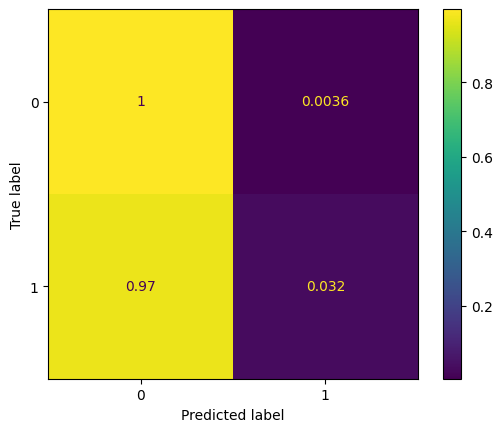

In [10]:

logits = model(X)
y_pred = nn.Sigmoid()(logits).round()
y_pred = y_pred.detach()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
y_test_cpu = y.cpu()
y_pred_cpu = y_pred.cpu()

cm = ConfusionMatrixDisplay(confusion_matrix(y_test_cpu,y_pred_cpu,normalize='true'))
cm.plot()
import plotly.express as px
fig = px.line(pd.DataFrame([y_pred_cpu.numpy().squeeze()*10,df_np[:,0]]).T.iloc[::20])
fig.show(renderer='browser')